<a href="https://colab.research.google.com/github/abaltyan/JsonToModelExtension/blob/master/mnist_compress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# source is https://medium.com/analytics-vidhya/dimension-manipulation-using-autoencoder-in-pytorch-on-mnist-dataset-7454578b018

In [ ]:
from six.moves import urllib    
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [ ]:
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz
!tar -zxvf MNIST.tar.gz

--2021-04-23 07:16:22--  http://www.di.ens.fr/~lelarge/MNIST.tar.gz
Resolving www.di.ens.fr (www.di.ens.fr)... 129.199.99.14
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.di.ens.fr/~lelarge/MNIST.tar.gz [following]
--2021-04-23 07:16:22--  https://www.di.ens.fr/~lelarge/MNIST.tar.gz
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘MNIST.tar.gz’

MNIST.tar.gz            [            <=>     ]  33.20M  6.36MB/s    in 15s     

2021-04-23 07:16:37 (2.29 MB/s) - ‘MNIST.tar.gz’ saved [34813078]

MNIST/
MNIST/raw/
MNIST/raw/train-labels-idx1-ubyte
MNIST/raw/t10k-labels-idx1-ubyte.gz
MNIST/raw/t10k-labels-idx1-ubyte
MNIST/raw/t10k-images-idx3-ubyte.gz
MNIST/raw/train-images-idx3-ubyte
MNIST/raw/train-labels-idx1-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyte
MNIST/raw/tra

In [ ]:
import torch
from copy import deepcopy
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms

# convert data to torch.FloatTensor
transform = transforms.ToTensor()
from torchvision.datasets import MNIST

train_data = MNIST(root = './', train=True, download=True, transform=transform)
test_data = MNIST(root = './', train=False, download=True, transform=transform)

In [ ]:
# Create training and test dataloaders

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9])


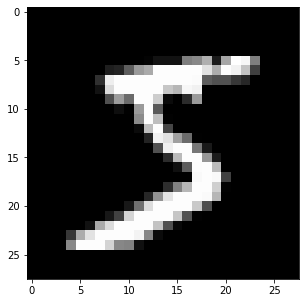

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# get one image from the batch
img = np.squeeze(images[0])

fig = plt.figure(figsize = (5,5)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
print(labels)

In [ ]:
from PIL import Image
img = (img.reshape((28, 28)) * 255).astype(np.uint8)
im = Image.fromarray(img)#.convert("RGB")
im.save("your_file.jpeg")

In [ ]:
img.shape

(28, 28)

In [ ]:
! ls -lth

total 67M
-rw-r--r-- 1 root root 2.4K Apr 22 17:35 Digit.bmp
drwx------ 5 root root 4.0K Apr 22 17:33 drive
drwxr-xr-x 1 root root 4.0K Apr 21 13:39 sample_data
-rw-r--r-- 1 root root  34M Mar  3 15:52 MNIST.tar.gz
-rw-r--r-- 1 root root  34M Mar  3 15:52 MNIST.tar.gz.1
drwxr-xr-x 4 1001 1001 4.0K Nov 17 21:12 MNIST


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        ## encoder ##
        # linear layer (784 -> encoding_dim)
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 392),
            nn.ReLU(),
            nn.Linear(392, 32),
            nn.ReLU()

        )
        self.decoder = nn.Sequential(
            nn.Linear(32,392),
            nn.ReLU(),
            nn.Linear(392, 28*28),
            nn.Sigmoid()
        )
        
        ## decoder ##
        # linear layer (encoding_dim -> input size)


    def forward(self, x):
        # add layer, with relu activation function
        x = self.encoder(x)
       
        # output layer (sigmoid for scaling from 0 to 1)
        x = self.decoder(x)
        return x

# initialize the NN
model = Autoencoder()
print(model)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=392, bias=True)
    (1): ReLU()
    (2): Linear(in_features=392, out_features=32, bias=True)
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=32, out_features=392, bias=True)
    (1): ReLU()
    (2): Linear(in_features=392, out_features=784, bias=True)
    (3): Sigmoid()
  )
)


In [ ]:
# specify loss function
criterion = nn.MSELoss()

# specify loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# number of epochs to train the model
n_epochs = 20

for epoch in range(1, n_epochs+1):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data in train_loader:
        # _ stands in for labels, here
        images, _ = data
        # flatten images
        images = images.view(images.size(0), -1)
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        outputs = model(images)
        # calculate the loss
        loss = criterion(outputs, images)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*images.size(0)
            
    # print avg training statistics 
    train_loss = train_loss/len(train_loader)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.405489
Epoch: 2 	Training Loss: 0.214453
Epoch: 3 	Training Loss: 0.188475
Epoch: 4 	Training Loss: 0.175756
Epoch: 5 	Training Loss: 0.167885
Epoch: 6 	Training Loss: 0.162255
Epoch: 7 	Training Loss: 0.157947
Epoch: 8 	Training Loss: 0.154638
Epoch: 9 	Training Loss: 0.151836
Epoch: 10 	Training Loss: 0.149467
Epoch: 11 	Training Loss: 0.146859
Epoch: 12 	Training Loss: 0.143785
Epoch: 13 	Training Loss: 0.141616
Epoch: 14 	Training Loss: 0.139788
Epoch: 15 	Training Loss: 0.138376
Epoch: 16 	Training Loss: 0.137022
Epoch: 17 	Training Loss: 0.135812
Epoch: 18 	Training Loss: 0.134903
Epoch: 19 	Training Loss: 0.133988
Epoch: 20 	Training Loss: 0.133140


In [ ]:
#--------------------------------------
#from google.colab import drive
#drive.flush_and_unmount()

In [ ]:
#--------------------------------------
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#--------------------------------------
#model_save_name = 'compressor.pt'
#path = F"/content/drive/MyDrive/{model_save_name}" 
#best_model_state = deepcopy(model.state_dict()) 
#torch.save(best_model_state, path)

In [ ]:
#---------------------------------------
model_save_name = 'compressor.pt'
path = F"/content/drive/MyDrive/{model_save_name}" 
#model.load_state_dict(torch.load(path))
model = Autoencoder()
model.load_state_dict(torch.load(path))
model.eval()

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=392, bias=True)
    (1): ReLU()
    (2): Linear(in_features=392, out_features=32, bias=True)
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=32, out_features=392, bias=True)
    (1): ReLU()
    (2): Linear(in_features=392, out_features=784, bias=True)
    (3): Sigmoid()
  )
)

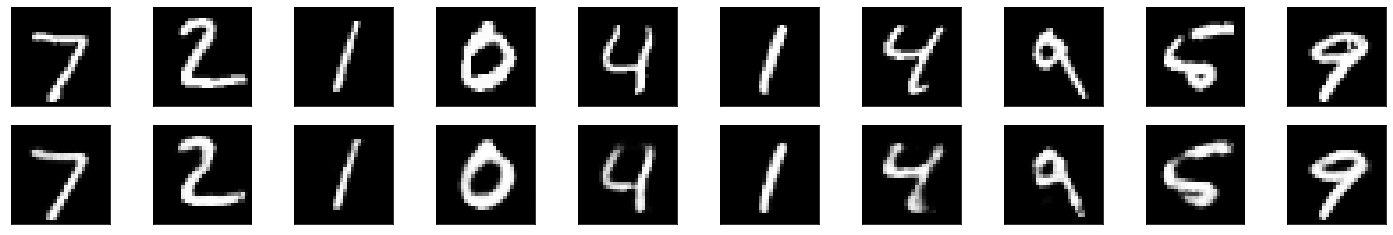

In [ ]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

images_flatten = images.view(images.size(0), -1)
# get sample outputs
output = model(images_flatten)
# prep images for display
images = images.numpy()

# output is resized into a batch of images
output = output.view(batch_size, 1, 28, 28)
# use detach when it's an output that requires_grad
output = output.detach().numpy()

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

# input images on top row, reconstructions on bottom
for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

In [ ]:
#Start Region  Image from local device
#------------------------------------

#from PIL import Image
#from numpy import array
#im_1 = Image.open(r"Digit.bmp")
#ar = array(im_1)
#ar

(28, 28, 3)

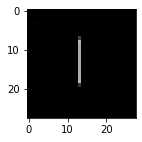

In [ ]:
#------------------------------------------ Image from local device
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('./one.png')
#cv2_imshow(img)
#plt.imshow(torch.from_numpy(ar), cmap ='gray')
fig = plt.figure(figsize = (2,2)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
img.astype(np.double)
img.shape

(28, 28)

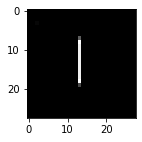

In [ ]:
#-----------------------------Image from local device
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

# = mpimg.imread('Digit.bmp')     
gray = rgb2gray(img)  
fig = plt.figure(figsize = (2,2)) 
ax = fig.add_subplot(111)
ax.imshow(gray, cmap='gray')
gray.shape

In [ ]:
#------------------------------- Image from local device
#encoder.to(torch.float64)
torch.flatten(torch.from_numpy(gray))
input = torch.flatten(torch.from_numpy(gray))
output1 = encoder(input.float())
output1

tensor([  0.0000,   0.0000, 193.3955,   0.0000, 358.4029, 307.6497, 487.0301,
          0.0000, 200.2502,   0.0000,   0.0000, 144.8197,  19.9472, 103.0936,
        218.7438, 210.1039, 130.8555, 219.5131, 144.7719,   0.0000,   0.0000,
          0.0000, 282.0826,   0.0000,  33.2472, 253.4624, 152.9744,   0.0000,
        239.8797, 332.6110, 225.7737,   0.0000], grad_fn=<ReluBackward0>)

In [ ]:
#------------------------------------Image from local device
#decoder.to(torch.float64)
res = decoder(output1)
res

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+

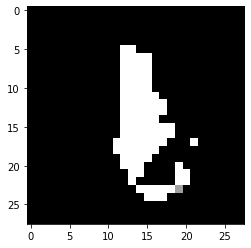

In [ ]:
plt.imshow(res.detach().numpy().squeeze().reshape(28, 28), cmap = 'gray')

#-----------------------------------
#End Region "Image from local device"

In [ ]:
encoder = model.encoder
decoder = model.decoder

In [ ]:
images, labels = dataiter.next()
images_flatten = images.view(images.size(0), -1)
output = model(images_flatten)
output.shape

torch.Size([20, 784])

In [ ]:
output = output.view(batch_size, 1, 28, 28)
output = output.detach().numpy()
output.shape

(20, 1, 28, 28)

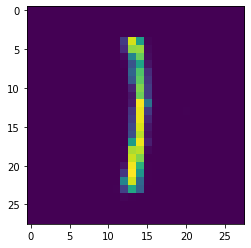

In [ ]:
plt.imshow(np.squeeze(output[0]))

In [ ]:
output_0 = encoder(images_flatten)

In [ ]:
output_0[0]

tensor([0.0000, 0.0000, 2.9016, 0.9503, 2.2469, 2.8997, 4.8801, 0.0000, 5.4620,
        4.3839, 0.0000, 3.8300, 5.2877, 2.3714, 9.0360, 3.3648, 2.8456, 2.6607,
        3.1622, 7.1231, 0.0000, 0.0000, 5.3576, 0.0000, 3.9850, 5.7313, 6.2382,
        0.0000, 3.0715, 3.2585, 6.1834, 0.0000], grad_fn=<SelectBackward>)

In [ ]:
res = decoder(output_0)

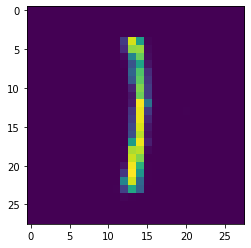

In [ ]:
plt.imshow(res[0].detach().numpy().squeeze().reshape(28, 28))